In [1]:
import pandas as pd
data = pd.read_csv("titanic-passengers.csv", sep = ";")
data.head()

PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S

In [8]:
Survived = {"Survived" :{"Yes" : 1, "No" : 0}}
data.replace(Survived , inplace = True)
data

PassengerId  Survived  Pclass  \
0            343         0       2   
1             76         0       3   
2            641         0       3   
3            568         0       3   
4            672         0       1   
..           ...       ...     ...   
886           10         1       2   
887           61         0       3   
888          535         0       3   
889          102         0       3   
890          428         1       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                                 ...     ...   ...    ...   
886                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
887                              Sirayanian, Mr. Orsen    male  22.0      0   
888                                Cacic, Miss. Marija  female  30.0      0   
889                   Petroff, Mr. Pastcho ("Pentcho")    male   NaN      0   
890  Phillips, Miss. Kate Florence ("Mrs Kate Louis...  female  19.0      0   

     Parch      Ticket     Fare  Cabin Embarked  
0        0      248740  13.0000    NaN        S  
1        0      348123   7.6500  F G73        S  
2        0      350050   7.8542    NaN        S  
3        4      349909  21.0750    NaN        S  
4        0  F.C. 12750  52.0000    B71        S  
..     ...         ...      ...    ...      ...  
886      0      237736  30.0708    NaN        C  
887      0        2669   7.2292    NaN        C  
888      0      315084   8.6625    NaN        S  
889      0      349215   7.8958    NaN        S  
890      0      250655  26.0000    NaN        S  

[891 rows x 12 columns]

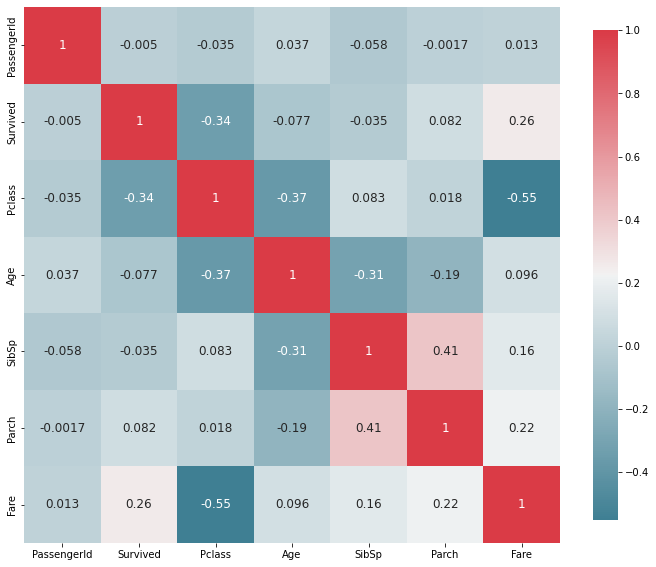

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_map(df):
    corr = df.corr()
    s, ax = plt.subplots(figsize = (12,10))
    cmap = sns.diverging_palette(220,10,as_cmap = True)
    s = sns.heatmap(
        corr,
        cmap = cmap,
        square = True,
        cbar_kws = {'shrink' : .9},
        ax = ax,
        annot = True,
        annot_kws = {'fontsize' : 12},    
    )
plot_correlation_map(data)

In [19]:
#strong corr between Survived and Pclass and between Survived and Age

In [23]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
data.fillna(data["Age"].mean(), inplace = True)

In [26]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
x = data[["Pclass", "Age"]]
y = data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .25, random_state = 0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print("Accuraccy={:,2}", format(logreg.score(x_test, y_test)))

Accuraccy={:,2} 0.6980568011958147


<AxesSubplot:xlabel='col_0', ylabel='Survived'>

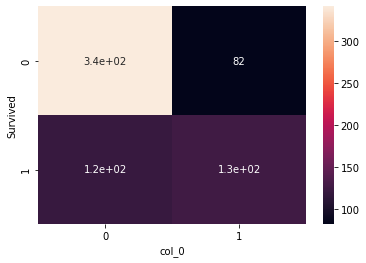

In [31]:
confusion_matrix = pd.crosstab(y_test, y_pred)
sns.heatmap (confusion_matrix, annot = True)

In [61]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
x = data[["Pclass", "Age"]].values
y = data["Survived"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .25, random_state = 0)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

In [64]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.659


In [65]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

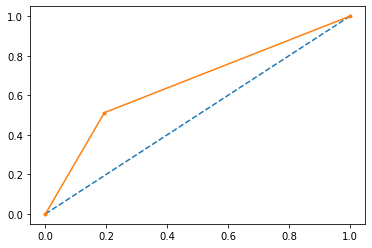

In [66]:
import matplotlib.pyplot as plt
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.show()

In [67]:
#auc > 0.5, prediction is correct